<a href="https://colab.research.google.com/github/NishanthAR-droid/Pump_predictive_maintenance/blob/main/labeldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **preprocessing**

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("combined_data.csv")
df=df.drop_duplicates()

# Drop the "water level" column
df.drop(df.columns[25],axis=1, inplace=True)

# Check for null or 0 values
null_or_zero_rows = df.isnull().any(axis=1) | (df == 0).any(axis=1)

# Remove rows with null or 0 values
df = df[~null_or_zero_rows]

# Add header at the first row by deleting the existing row
header = ["pump_Id", "date", "timestamp", "Vr", "Vy", "Vb", "Ir", "Iy", "Ib", "freq", "power", "pf",
          "MNDE_temp", "MDE_temp", "PNDE_temp", "PDE_temp", "MNDE_vib", "MDE_vib", "PNDE_vib",
          "PDE_vib", "speed", "pump_eff", "motor_eff", "combined_eff", "water_flow", "head"]
df.columns = header


df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.sort_values(by='timestamp')

# Save the preprocessed data to a new CSV file
df.to_csv("preprocessed_data.csv", index=False)

# Optionally, you can display the first few rows of the preprocessed data

print(df.shape)
print(df.head())
# Print the total number of entries
total_entries = df.shape[0]
print("Total number of entries:", total_entries)


(895, 26)
   pump_Id        date           timestamp           Vr           Vy  \
0  Pump 01  02-26-2024 2024-02-26 15:34:35  6512.258789  6646.126465   
1  Pump 01  02-26-2024 2024-02-26 16:21:55  6768.656738  6906.000977   
2  Pump 01  02-26-2024 2024-02-26 16:24:39  6736.769531  6876.208008   
4  Pump 01  02-26-2024 2024-02-26 16:27:28  6725.375488  6863.557129   
5  Pump 01  02-26-2024 2024-02-26 16:33:02  6702.876953  6841.943848   

            Vb          Ir          Iy          Ib       freq  ...  MNDE_vib  \
0  6606.902344  128.813583  129.891769  126.901161  49.952621  ...  1.898533   
1  6866.155762  124.131844  125.164635  121.921127  49.984249  ...  1.921614   
2  6832.993652  124.243103  125.303185  121.940392  49.942886  ...  1.874649   
4  6819.385254  124.026619  124.980347  121.713524  49.863087  ...  1.950923   
5  6797.928223  125.781494  126.950562  123.485809  50.043442  ...  1.859869   

    MDE_vib  PNDE_vib   PDE_vib        speed   pump_eff  motor_eff  \
0  1.9

# Labelling Vibration data

In [ ]:
import pandas as pd
import numpy as np

filename="preprocessed_data"

df = pd.read_csv(filename +".csv")
df=df.iloc[:,[0,1,2,16,17,18,19]].drop_duplicates()
df = df[(df != 0).all(axis=1)]


def classify_value(value):
    if value < 4.2:
        return 'normal'
    elif value < 7.2:
        return 'alarm'
    else:
        return 'shutdown'

def determine_final_class(row):
    last_four_columns = row[-4:]  # Consider only the last four columns
    if 'shutdown' in last_four_columns.values:
        return 'shutdown'
    elif 'alarm' in last_four_columns.values:
        return 'alarm'
    else:
        return 'normal'



# df.iloc[:295,5:7]/=1.7
df.iloc[2000:4000,3:7]*=(1.7)
df.iloc[4000:4896,3:5]*=(1.7)
df.iloc[4896:5500,3:5]*=(1.7*1.7)
df.iloc[5500:,3:7]*=(1.7*1.7)
df = df.apply(np.random.permutation)

# Apply the classification function to the specified columns and create new columns for the classes
columns_to_classify = [3, 4, 5, 6]  # Specify the column numbers to classify
for col_num in columns_to_classify:
    col_name = df.columns[col_num]  # Get the column name based on column number
    new_col_name = f'{col_name}_class'  # Create a new column name for the classes
    df[new_col_name] = df.iloc[:, col_num].apply(classify_value)

df['final_class'] = df.apply(determine_final_class, axis=1)

# Write the updated DataFrame back to a new CSV file
df.to_csv(filename + "_labeled.csv", index=False)

value_counts = df['MNDE_vib_class'].value_counts()
print(value_counts)
value_counts = df['final_class'].value_counts()
print(value_counts)
print(df.shape)
df.head()

MNDE_vib_class
normal    895
Name: count, dtype: int64
final_class
normal    895
Name: count, dtype: int64
(895, 12)


,pump_Id,date,timestamp,MNDE_vib,MDE_vib,PNDE_vib,PDE_vib,MNDE_vib_class,MDE_vib_class,PNDE_vib_class,PDE_vib_class,final_class
0,Pump 01,02-27-2024,2024-02-28 09:37:58,1.856937,1.941766,2.979504,3.079664,normal,normal,normal,normal,normal
1,Pump 01,02-27-2024,2024-02-26 16:27:28,1.847783,1.930485,3.210539,3.096147,normal,normal,normal,normal,normal
2,Pump 01,02-29-2024,2024-02-28 01:47:23,1.862705,1.953361,3.523101,3.132000,normal,normal,normal,normal,normal
3,Pump 01,02-29-2024,2024-02-29 10:46:54,1.848267,2.027068,3.362917,3.443289,normal,normal,normal,normal,normal
4,Pump 01,02-29-2024,2024-02-26 21:26:12,1.940548,1.941572,3.275881,3.030747,normal,normal,normal,normal,normal


# **labelling power data**

In [ ]:
import pandas as pd
import numpy as np


filename="preprocessed_data"

df = pd.read_csv(filename +".csv")
df=df.iloc[:,:12].drop_duplicates()
df = df[(df != 0).all(axis=1)]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.sort_values(by='timestamp')

def calculate_rms(row):
    return np.sqrt(np.mean(row ** 2))

def classify_power_I(value,rated_value):
    percentage_difference = abs(value - rated_value) / rated_value * 100
    if percentage_difference < 3.5:
        return 'normal'
    elif percentage_difference < 6:
        return 'alarm'
    else:
        return 'shutdown'

def classify_V(value,rated_value):
    percentage_difference = abs(value - rated_value) / rated_value * 100
    if percentage_difference < 6:
        return 'normal'
    elif percentage_difference < 8:
        return 'alarm'
    else:
        return 'shutdown'


df['voltage_RMS'] = df[['Vr', 'Vy', 'Vb']].apply(calculate_rms,axis=1)
df['current_RMS'] = df[['Ir', 'Iy', 'Ib']].apply(calculate_rms,axis=1)

df['V_class'] = df['voltage_RMS'].apply(classify_V,rated_value=6600)
df['I_class'] = df['current_RMS'].apply(classify_power_I,rated_value=125)
df['P_class'] = df['power'].apply(classify_power_I,rated_value=1250)

# df['P_class2'] = df['power_RMS'].apply(classify_power)
# df['final_class'] = df.iloc[:, -3:].mode(axis=1).iloc[:, 0]

df.to_csv(filename + "_labeled.csv", index=False)

value_counts = df['P_class'].value_counts()
print(value_counts)
print(df.shape)
# print(rated_power)
df.head()

P_class
alarm       523
normal      236
shutdown    136
Name: count, dtype: int64
(895, 17)


,pump_Id,date,timestamp,Vr,Vy,Vb,Ir,Iy,Ib,freq,power,pf,voltage_RMS,current_RMS,V_class,I_class,P_class
0,Pump 01,02-26-2024,2024-02-26 15:34:35,6512.258789,6646.126465,6606.902344,128.813583,129.891769,126.901161,49.952621,1307.183350,0.872374,6588.668811,128.541453,normal,normal,alarm
1,Pump 01,02-26-2024,2024-02-26 16:21:55,6768.656738,6906.000977,6866.155762,124.131844,125.164635,121.921127,49.984249,1310.645264,0.875093,6847.180891,123.746598,normal,normal,alarm
2,Pump 01,02-26-2024,2024-02-26 16:24:39,6736.769531,6876.208008,6832.993652,124.243103,125.303185,121.940392,49.942886,1305.701660,0.875757,6815.572916,123.836849,normal,normal,alarm
3,Pump 01,02-26-2024,2024-02-26 16:27:28,6725.375488,6863.557129,6819.385254,124.026619,124.980347,121.713524,49.863087,1302.885254,0.876294,6803.016663,123.581109,normal,normal,alarm
4,Pump 01,02-26-2024,2024-02-26 16:33:02,6702.876953,6841.943848,6797.928223,125.781494,126.950562,123.485809,50.043442,1315.167236,0.875000,6781.164679,125.414213,normal,normal,alarm


#Labelling temp data

In [ ]:
import pandas as pd
import numpy as np

filename="preprocessed_data"

df = pd.read_csv(filename +".csv")
df=df.iloc[:,[0,1,2,12,13,14,15]].drop_duplicates()
df = df[(df != 0).all(axis=1)]

def classify_temp(value):
    if value<49:
        return 'normal'
    elif value < 54:
        return 'alarm'
    else:
        return 'shutdown'

df.iloc[678:,3:7]+=10
df.iloc[427:678,3:7]+=4
df.iloc[:239,3:7]+=15

df['MNDE_class'] = df['MNDE_temp'].apply(classify_temp)
df['MDE_class'] = df['MDE_temp'].apply(classify_temp)
df['PNDE_class'] = df['PNDE_temp'].apply(classify_temp)
df['PDE_class'] = df['PDE_temp'].apply(classify_temp)
df['final_class'] = df.iloc[:, -4:].mode(axis=1).iloc[:, 0]

df.to_csv(filename + "_labeled.csv", index=False)

value_counts = df['final_class'].value_counts()
print(value_counts)
print(df.shape)
df.head()

class1    389
class2    195
class4    163
class3    148
Name: final_class, dtype: int64
(895, 12)


,pump_Id,date,timestamp,MNDE_temp,MDE_temp,PNDE_temp,PDE_temp,MNDE_class,MDE_class,PNDE_class,PDE_class,final_class
0,Pump 01,02-26-2024,15:34:35,56.160795,56.631619,22.821142,61.288155,class4,class4,class1,class4,class4
1,Pump 01,02-26-2024,16:21:55,56.376192,56.881324,26.345882,61.366765,class4,class4,class1,class4,class4
2,Pump 01,02-26-2024,16:24:39,56.617898,56.896968,26.188060,61.253020,class4,class4,class1,class4,class4
3,Pump 01,02-26-2024,16:27:28,56.573761,56.981996,25.465278,61.277501,class4,class4,class1,class4,class4
4,Pump 01,02-26-2024,16:33:02,56.573042,56.940255,24.778056,61.294573,class4,class4,class1,class4,class4


#Labelling all data

In [ ]:
import pandas as pd
import numpy as np


filename="preprocessed_data"

df = pd.read_csv(filename +".csv")
df=df.iloc[:,:20].drop_duplicates()
df = df[(df != 0).all(axis=1)]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.sort_values(by='timestamp')

def calculate_rms(row):
    return np.sqrt(np.mean(row ** 2))

def classify_vibration(vibration):
    if vibration < 4.2:
        return 'normal'
    elif vibration < 7.2:
        return 'alarm'
    else:
        return 'shutdown'

def classify_temperature(temperature):
    if temperature<49:
        return 'normal'
    elif temperature < 54:
        return 'alarm'
    else:
        return 'shutdown'

def classify_power_I(value,rated_value):
    percentage_difference = abs(value - rated_value) / rated_value * 100
    if percentage_difference < 3.5:
        return 'normal'
    elif percentage_difference < 6:
        return 'alarm'
    else:
        return 'shutdown'

def classify_V(value,rated_value):
    percentage_difference = abs(value - rated_value) / rated_value * 100
    if percentage_difference < 6:
        return 'normal'
    elif percentage_difference < 8:
        return 'alarm'
    else:
        return 'shutdown'

def determine_final_class(row):
    last_four_columns = row[-4:]  # Consider only the last four columns
    if 'shutdown' in last_four_columns.values:
        return 'shutdown'
    elif 'alarm' in last_four_columns.values:
        return 'alarm'
    else:
        return 'normal'


df['voltage_RMS'] = df[['Vr', 'Vy', 'Vb']].apply(calculate_rms,axis=1)
df['current_RMS'] = df[['Ir', 'Iy', 'Ib']].apply(calculate_rms,axis=1)

df['V_class'] = df['voltage_RMS'].apply(classify_V,rated_value=6600)
df['I_class'] = df['current_RMS'].apply(classify_power_I,rated_value=125)
df['P_class'] = df['power'].apply(classify_power_I,rated_value=1250)

df['MNDE_temp_class'] = df['MNDE_temp'].apply(classify_temperature)
df['MDE_temp_class'] = df['MDE_temp'].apply(classify_temperature)
df['PNDE_temp_class'] = df['PNDE_temp'].apply(classify_temperature)
df['PDE_temp_class'] = df['PDE_temp'].apply(classify_temperature)
df['temperature_class'] = df.apply(determine_final_class, axis=1)

df['MNDE_vib_class'] = df['MNDE_vib'].apply(classify_vibration)
df['MDE_vib_class'] = df['MDE_vib'].apply(classify_vibration)
df['PNDE_vib_class'] = df['PNDE_vib'].apply(classify_vibration)
df['PDE_vib_class'] = df['PDE_vib'].apply(classify_vibration)
df['vibration_class'] = df.apply(determine_final_class, axis=1)



df.to_csv(filename + "_labeled.csv", index=False)

value_counts = df['V_class'].value_counts()
print(value_counts)
value_counts = df['I_class'].value_counts()
print(value_counts)
value_counts = df['P_class'].value_counts()
print(value_counts)
value_counts = df['temperature_class'].value_counts()
print(value_counts)
value_counts = df['vibration_class'].value_counts()
print(value_counts)

print(df.shape)
df.head()

V_class
normal      6426
alarm        268
shutdown      16
Name: count, dtype: int64
I_class
normal      5544
alarm       1038
shutdown     128
Name: count, dtype: int64
P_class
alarm       4282
shutdown    2059
normal       369
Name: count, dtype: int64
temperature_class
normal      6367
alarm        341
shutdown       2
Name: count, dtype: int64
vibration_class
normal    6710
Name: count, dtype: int64
(6710, 35)


,pump_Id,date,timestamp,Vr,Vy,Vb,Ir,Iy,Ib,freq,...,MNDE_temp_class,MDE_temp_class,PNDE_temp_class,PDE_temp_class,temperature_class,MNDE_vib_class,MDE_vib_class,PNDE_vib_class,PDE_vib_class,vibration_class
0,Pump 01,02-26-2024,2024-02-26 15:34:35,6512.258789,6646.126465,6606.902344,128.813583,129.891769,126.901161,49.952621,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
1,Pump 01,02-26-2024,2024-02-26 16:21:55,6768.656738,6906.000977,6866.155762,124.131844,125.164635,121.921127,49.984249,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
2,Pump 01,02-26-2024,2024-02-26 16:24:39,6736.769531,6876.208008,6832.993652,124.243103,125.303185,121.940392,49.942886,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
3,Pump 01,02-26-2024,2024-02-26 16:27:28,6725.375488,6863.557129,6819.385254,124.026619,124.980347,121.713524,49.863087,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
4,Pump 01,02-26-2024,2024-02-26 16:33:02,6702.876953,6841.943848,6797.928223,125.781494,126.950562,123.485809,50.043442,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal


# **smote balancing**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

filename="preprocessed_data_labeled"

df = pd.read_csv(filename +".csv")


X = df.iloc[:,3:7]  # Features
y = df['final_class']  # Labels

# Identify minority class
minority_class = y.value_counts().idxmin()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Optional: Shuffle the dataset
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
resampled_df = resampled_df.sample(frac=1).reset_index(drop=True)

resampled_df.to_csv(filename + "_SMOTE.csv", index=False)

value_counts = resampled_df['final_class'].value_counts()
print(value_counts)
print(resampled_df.shape)
# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


final_class
normal      3541
shutdown    3541
alarm       3541
Name: count, dtype: int64
(10623, 5)


# **power Vs time**

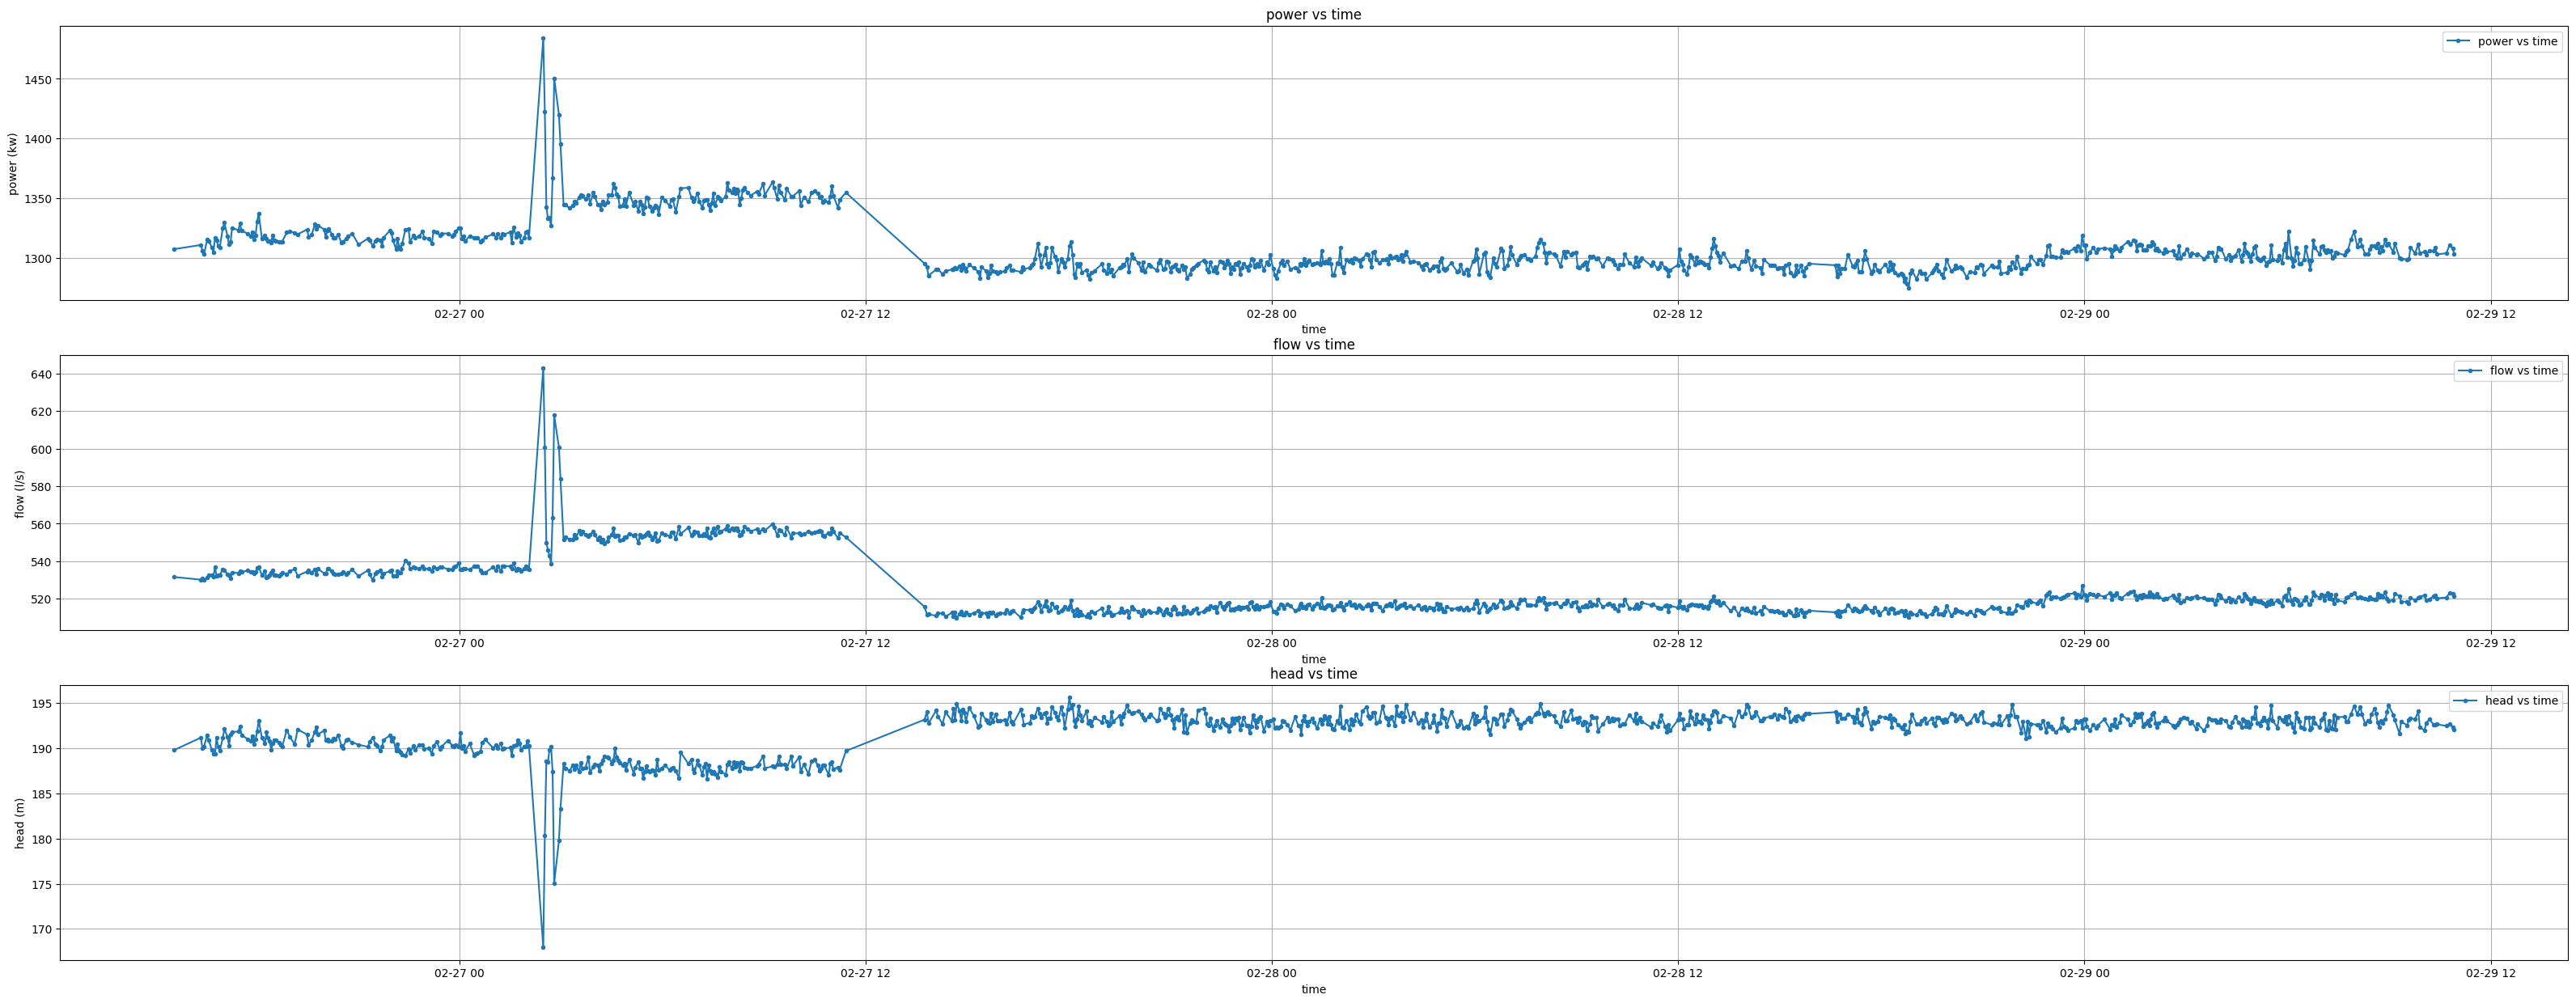

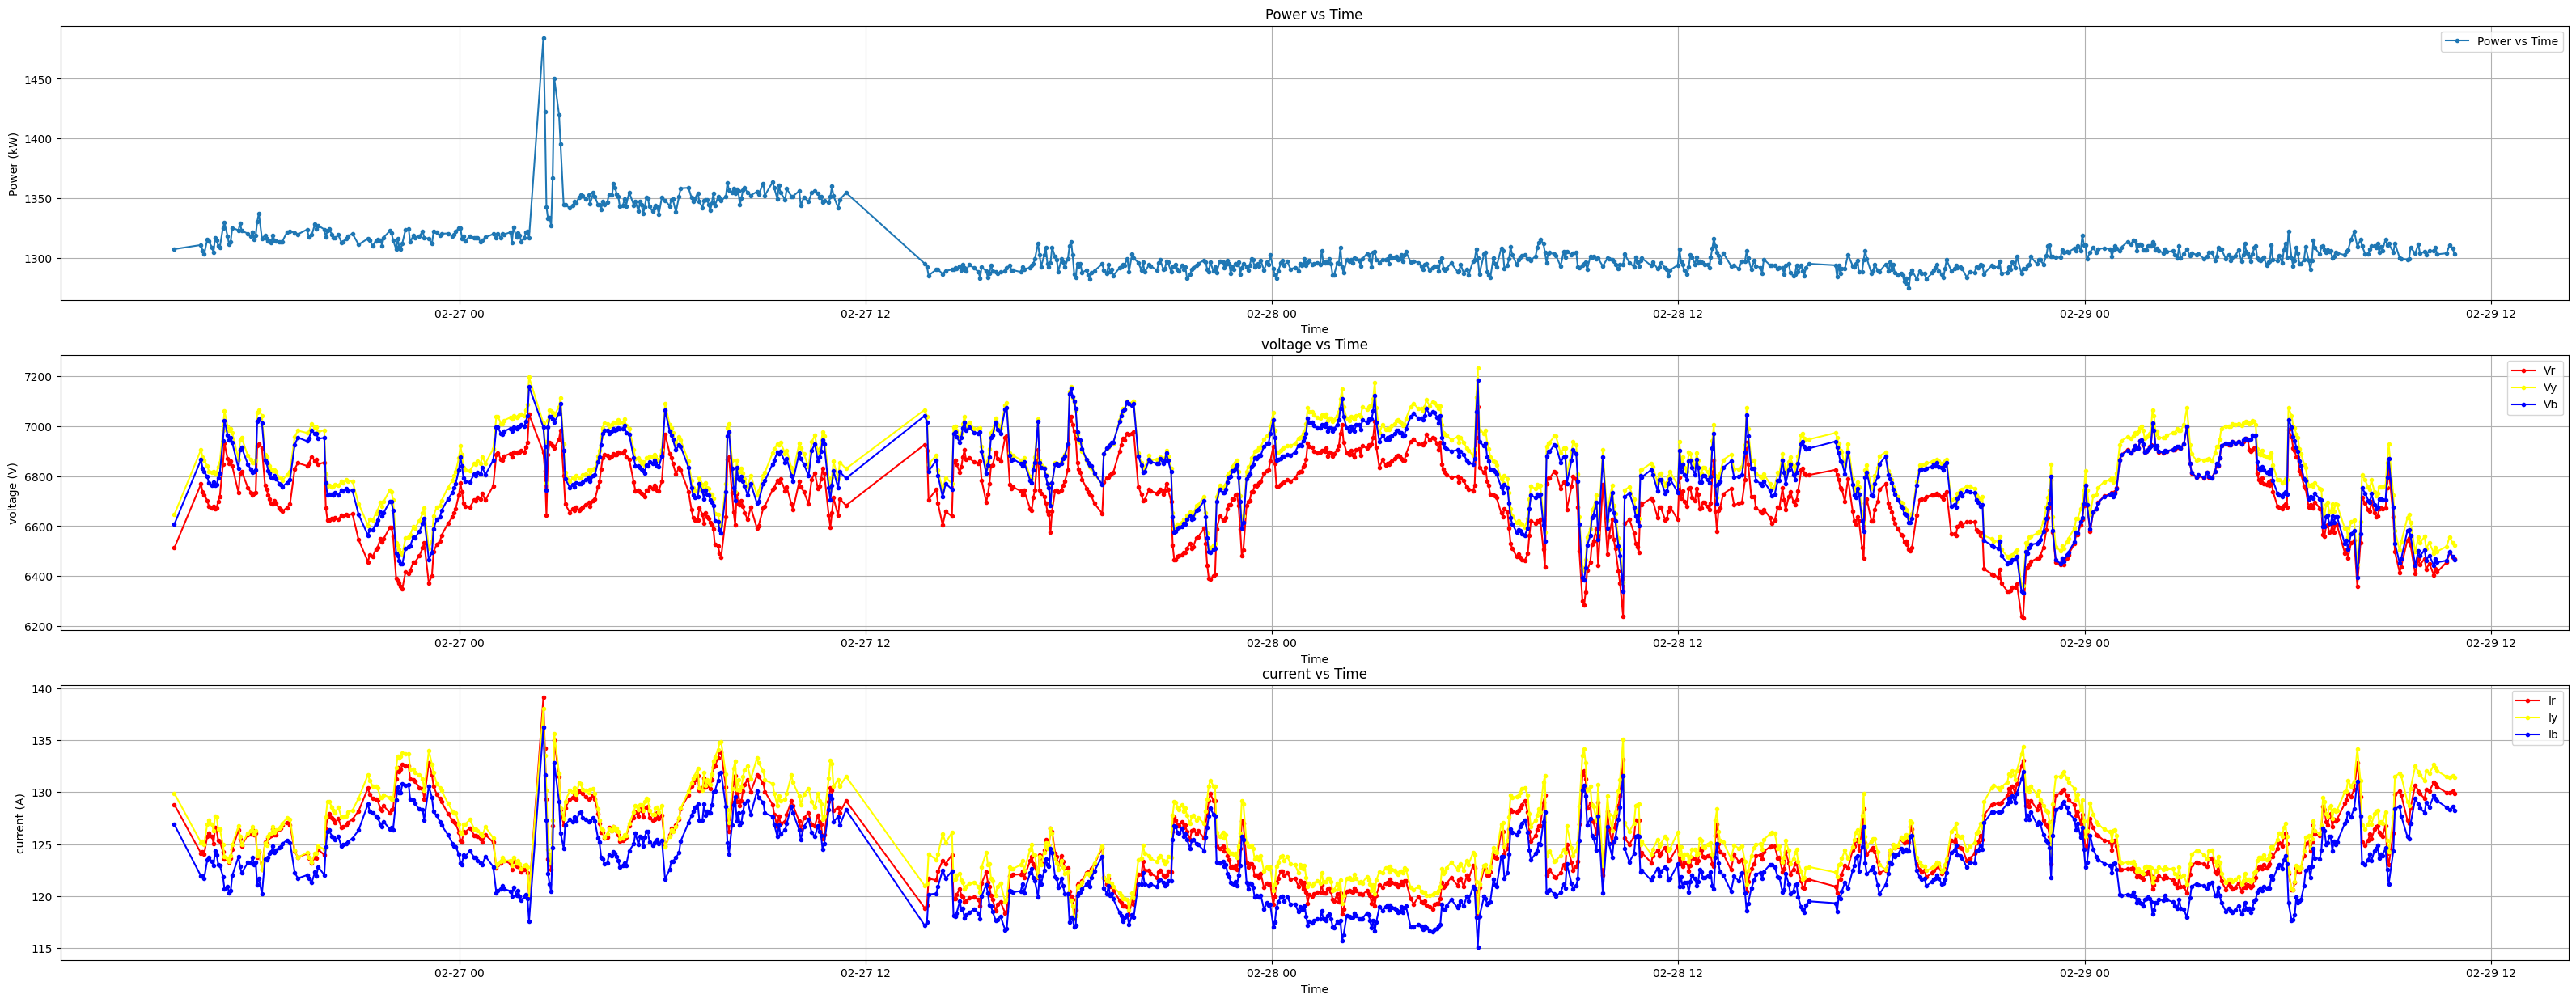

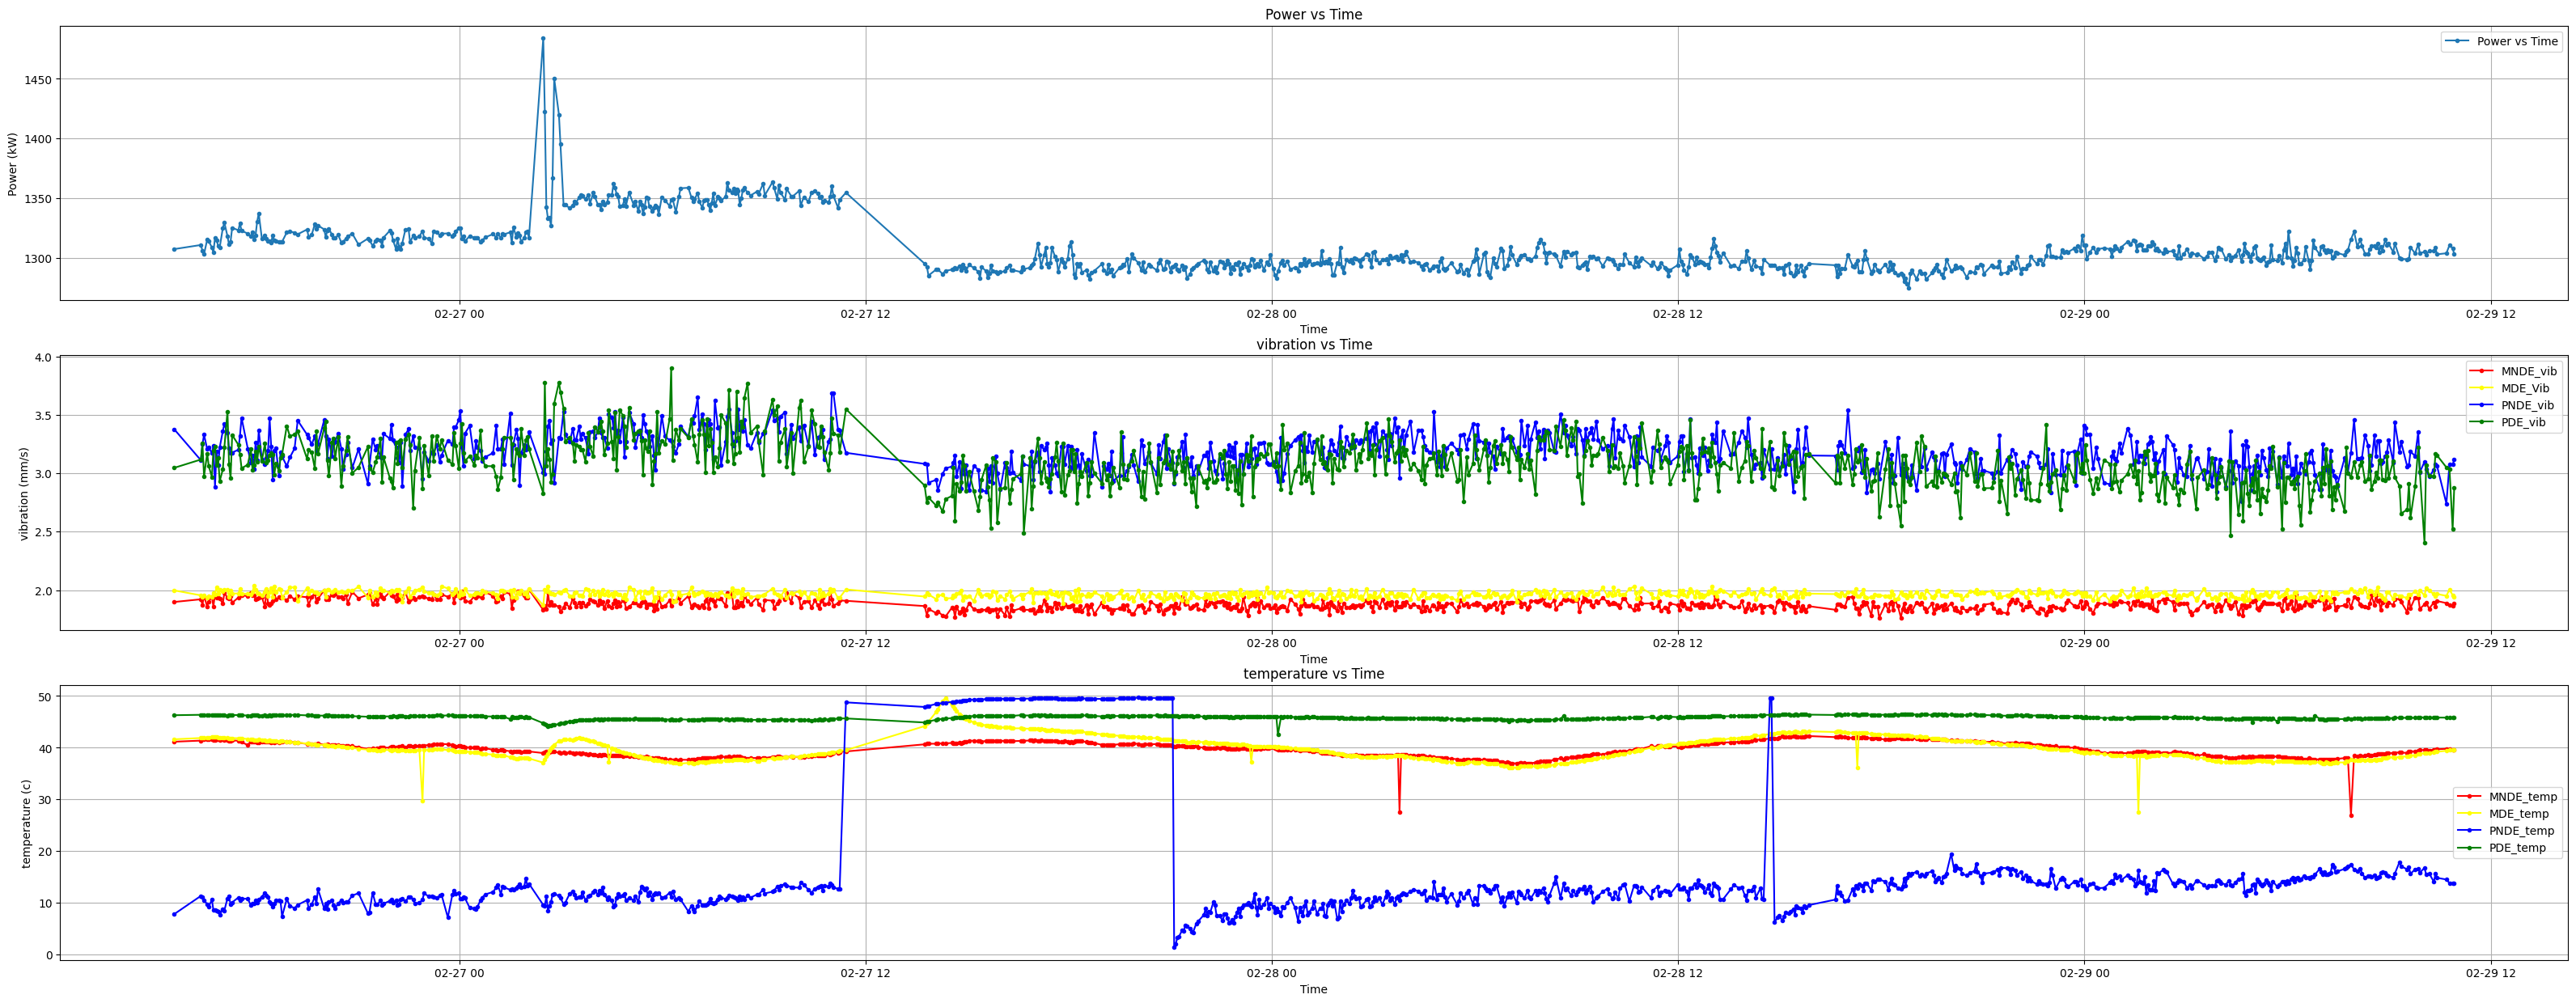

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


filename="preprocessed_data"
df = pd.read_csv(filename +".csv")
df = df[(df != 0).all(axis=1)]
df=df.drop_duplicates()
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.sort_values(by='timestamp')



# df['head_pressure']=df['Head']/10.02

# Plotting head vs flow
plt.figure(figsize=(40, 15))
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['power'],'.-',  label='power vs time')
plt.title('power vs time')
plt.xlabel('time')
plt.ylabel('power (kw)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['water_flow'],'.-',  label='flow vs time')
plt.title('flow vs time')
plt.xlabel('time')
plt.ylabel('flow (l/s)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['head'],'.-',  label='head vs time')
plt.title('head vs time')
plt.xlabel('time')
plt.ylabel('head (m)')
plt.legend()
plt.grid(True)
plt.show()






# Plotting power vs time
plt.figure(figsize=(40, 15))
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['power'],'.-',  label='Power vs Time')
plt.title('Power vs Time')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)

# # Plotting voltage vs time
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['Vr'],'.-',  label='Vr', color="red")
plt.plot(df['timestamp'], df['Vy'],'.-',  label='Vy', color="yellow")
plt.plot(df['timestamp'], df['Vb'],'.-',  label='Vb', color="blue")
plt.title('voltage vs Time')
plt.xlabel('Time')
plt.ylabel('voltage (V)')
plt.legend()
plt.grid(True)


# # Plotting current vs time
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['Ir'],'.-',  label='Ir', color="red")
plt.plot(df['timestamp'], df['Iy'],'.-',  label='Iy', color="yellow")
plt.plot(df['timestamp'], df['Ib'],'.-',  label='Ib', color="blue")
plt.title('current vs Time')
plt.xlabel('Time')
plt.ylabel('current (A)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting power vs time
plt.figure(figsize=(40, 15))
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['power'],'.-',  label='Power vs Time')
plt.title('Power vs Time')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)

# Plotting voltage vs time
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['MNDE_vib'],'.-',  label='MNDE_vib', color="red")
plt.plot(df['timestamp'], df['MDE_Vib'],'.-',  label='MDE_Vib', color="yellow")
plt.plot(df['timestamp'], df['PNDE_vib'],'.-',  label='PNDE_vib', color="blue")
plt.plot(df['timestamp'], df['PDE_vib'],'.-',  label='PDE_vib', color="green")
plt.title('vibration vs Time')
plt.xlabel('Time')
plt.ylabel('vibration (mm/s)')
plt.legend()
plt.grid(True)


# Plotting current vs time
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['MNDE_temp'],'.-',  label='MNDE_temp', color="red")
plt.plot(df['timestamp'], df['MDE_temp'],'.-',  label='MDE_temp', color="yellow")
plt.plot(df['timestamp'], df['PNDE_temp'],'.-',  label='PNDE_temp', color="blue")
plt.plot(df['timestamp'], df['PDE_temp'],'.-',  label='PDE_temp', color="green")
plt.title('temperature vs Time')
plt.xlabel('Time')
plt.ylabel('temperature (c)')
plt.legend()
plt.grid(True)
plt.show()

# **FFT for vibration**

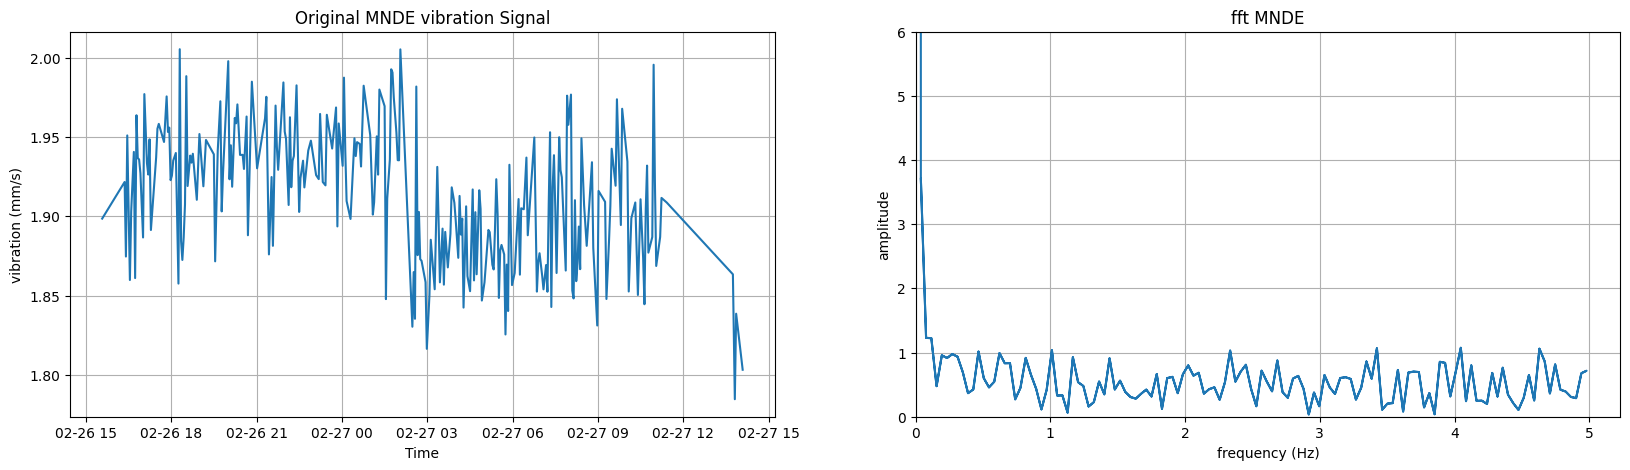

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

filename="preprocessed_data_labeled"
df = pd.read_csv(filename +".csv")
df = df[(df != 0).all(axis=1)]
df=df.drop_duplicates()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.sort_values(by='timestamp')

sampling_rate=10
sampling_interval=1/sampling_rate
start=0
n_sample=256

# MNDE_vib
fft_result=np.fft.fft(df.loc[start:n_sample,'MNDE_vib'])
fft_freq = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(df.loc[start:n_sample,'timestamp'], df.loc[start:n_sample,'MNDE_vib'])
plt.title('Original MNDE vibration Signal')
plt.xlabel('Time')
plt.ylabel('vibration (mm/s)')
plt.grid(True)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(np.abs(fft_freq),np.abs(fft_result))
plt.ylim(0,6)
# plt.yscale('log')

plt.xlim(0,None)
plt.title('fft MNDE')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.grid(True)
plt.show()


# MDE_vib
# fft_result=np.fft.fft(df.loc[start:n_sample,'MDE_vib'])
# fft_freq = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

# plt.figure(figsize=(20,5))

# plt.subplot(1,2,1)
# plt.plot(df.loc[start:n_sample,'timestamp'], df.loc[start:n_sample,'MDE_vib'])
# plt.title('Original MDE vibration Signal')
# plt.xlabel('Time')
# plt.ylabel('vibration (mm/s)')
# plt.grid(True)


# plt.subplot(1,2,2)
# plt.plot(np.abs(fft_freq),np.abs(fft_result))
# plt.yscale('log')
# plt.ylim(0,6)
# plt.xlim(0,None)
# plt.title('fft MDE')
# plt.xlabel('frequency (Hz)')
# plt.ylabel('amplitude')
# plt.grid(True)
# plt.show()


# # PDE_vib
# fft_result=np.fft.fft(df.loc[start:n_sample,'PDE_vib'])
# fft_freq = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

# plt.figure(figsize=(20,5))

# plt.subplot(1,2,1)
# plt.plot(df.loc[start:n_sample,'timestamp'], df.loc[start:n_sample,'PDE_vib'])
# plt.title('Original PDE vibration Signal')
# plt.xlabel('Time')
# plt.ylabel('vibration (mm/s)')
# plt.grid(True)


# plt.subplot(1,2,2)
# plt.plot(np.abs(fft_freq),np.abs(fft_result))
# plt.ylim(0,10)
# plt.xlim(0,None)
# plt.title('fft PDE')
# plt.xlabel('frequency (Hz)')
# plt.ylabel('amplitude')
# plt.grid(True)
# plt.show()


# # PNDE_vib
# fft_result=np.fft.fft(df.loc[start:n_sample,'PNDE_vib'])
# fft_freq = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

# plt.figure(figsize=(20,5))

# plt.subplot(1,2,1)
# plt.plot(df.loc[start:n_sample,'timestamp'], df.loc[start:n_sample,'PNDE_vib'])
# plt.title('Original PNDE vibration Signal')
# plt.xlabel('Time')
# plt.ylabel('vibration (mm/s)')
# plt.grid(True)


# plt.subplot(1,2,2)
# plt.plot(np.abs(fft_freq),np.abs(fft_result))
# plt.ylim(0,10)
# plt.xlim(0,None)
# plt.title('fft PNDE')
# plt.xlabel('frequency (Hz)')
# plt.ylabel('amplitude')
# plt.grid(True)
# plt.show()

# **FFT images generation**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

filename = "preprocessed_data_labeled"
df = pd.read_csv(filename + ".csv")
df = df[(df != 0).all(axis=1)]
df = df.drop_duplicates()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')


# Define the folder path where you want to save the plots
folder_path = "/content/fft_MNDE_bad"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

sampling_rate = 10000
sampling_interval = 1 / sampling_rate
n_sample = 64
signal="MNDE_vib"

# Iterate over the dataframe in chunks of 64 rows
for start in range(0, len(df), n_sample):
    chunk_df = df.iloc[start:start+n_sample]

    # Compute FFT for the chunk
    fft_result = np.fft.fft(chunk_df[signal])
    fft_freq = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

    # Plot and save the graphs
    plt.figure(figsize=(10, 5))
    plt.plot(np.abs(fft_freq), np.abs(fft_result))
    plt.ylim(0, 6)
    plt.xlim(0, None)
    plt.title(f'FFT {signal}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Save the plot as PNG or JPEG image
    plot_filename = os.path.join(folder_path, f'plot_{start+6720}.png')
    plt.savefig(plot_filename)

    plt.close()  # Close the figure to avoid memory issues

    print(f"Plot saved for rows {start} to {start + n_sample - 1}")

# !zip -r fft_MNDE_good.zip /content/fft_MNDE_good
!zip -r fft_MNDE_bad.zip /content/fft_MNDE_bad

  adding: content/fft_MNDE_bad/ (stored 0%)
  adding: content/fft_MNDE_bad/plot_2432.png (deflated 12%)
  adding: content/fft_MNDE_bad/plot_3072.png (deflated 12%)
  adding: content/fft_MNDE_bad/plot_9152.png (deflated 10%)
  adding: content/fft_MNDE_bad/plot_3904.png (deflated 13%)
  adding: content/fft_MNDE_bad/plot_5312.png (deflated 12%)
  adding: content/fft_MNDE_bad/plot_6336.png (deflated 13%)
  adding: content/fft_MNDE_bad/plot_576.png (deflated 11%)
  adding: content/fft_MNDE_bad/plot_10944.png (deflated 10%)
  adding: content/fft_MNDE_bad/plot_1088.png (deflated 12%)
  adding: content/fft_MNDE_bad/plot_1600.png (deflated 11%)
  adding: content/fft_MNDE_bad/plot_12416.png (deflated 10%)
  adding: content/fft_MNDE_bad/plot_5632.png (deflated 12%)
  adding: content/fft_MNDE_bad/plot_3712.png (deflated 11%)
  adding: content/fft_MNDE_bad/plot_11200.png (deflated 8%)
  adding: content/fft_MNDE_bad/plot_1472.png (deflated 11%)
  adding: content/fft_MNDE_bad/plot_10368.png (deflated

# **fft image classification**

In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('img_data',image_size=(512,512))

# class 0=bad
# class 1=good


#  Load Data
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


#  Scale Data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()


#  Split Data
len(data)
train_size = int(len(data)*.7)+1 #10
val_size = int(len(data)*.2) #2
test_size = int(len(data)*.1)+1 #2


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



# build deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(512,512,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

#train model
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])



#plot loss and accuracy
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


#evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


#test
import cv2
img = cv2.imread('plot_13376.png')
plt.imshow(img)
plt.show()


resize = tf.image.resize(img, (512,512))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print(f'Predicted class is good')
else:
    print(f'Predicted class is bad')


from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier_MNDE.h5'))

new_model = load_model('imageclassifier_MNDE.h5')
yhat=new_model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is good')
else:
    print(f'Predicted class is bad')

array([[0.97195697]], dtype=float32)

#KNN Classification for vibration

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read the CSV file
df = pd.read_csv("preprocessed_data_labeled.csv")

# Separate features (X) and target variable (y)
X = df[['MNDE_vib', 'MDE_vib', 'PNDE_vib','PDE_vib']] # Specify the column containing features
y = df['final_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with k=5 (you can choose the value of k)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))



KeyError: "['MDE vib', 'PDE vib'] not in index"

#KNN Classification for temp data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read the CSV file
df = pd.read_csv("preprocessed_data_labeled.csv")

# Separate features (X) and target variable (y)
X = df[["MNDE_temp", "MDE_temp", "PNDE_temp", "PDE_temp"]] # Specify the column containing features
y = df['final_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with k=5 (you can choose the value of k)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

#KNN Classification for power data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read the CSV file
df = pd.read_csv("preprocessed_data_labeled.csv")

# Separate features (X) and target variable (y)
X = df[['voltage_RMS','current_RMS']]# Specify the column containing features
y = df['P_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with k=5 (you can choose the value of k)
knn = KNeighborsClassifier(n_neighbors=7)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))




[[102   5   0]
 [  5  41   0]
 [  1   0  25]]
              precision    recall  f1-score   support

       alarm       0.94      0.95      0.95       107
      normal       0.89      0.89      0.89        46
    shutdown       1.00      0.96      0.98        26

    accuracy                           0.94       179
   macro avg       0.95      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



#SVM Classification for power data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Read the CSV file
df = pd.read_csv("preprocessed_data.csv")


label_map={"class1":1,"class2":2,"class3":3,"class4":4}
df['V_class']=df['V_class'].map(label_map)
df['I_class']=df['I_class'].map(label_map)

# Separate features (X) and target variable (y)
X = df[['Vr', 'Vy', 'Vb','Ir', 'Iy', 'Ib','V_class','I_class']]# Specify the column containing features
y = df['P_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a specified kernel (e.g., 'linear', 'rbf', 'poly')
svm = SVC(kernel='poly')

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


KeyError: 'V_class'

#KMEANS Clustering for power data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


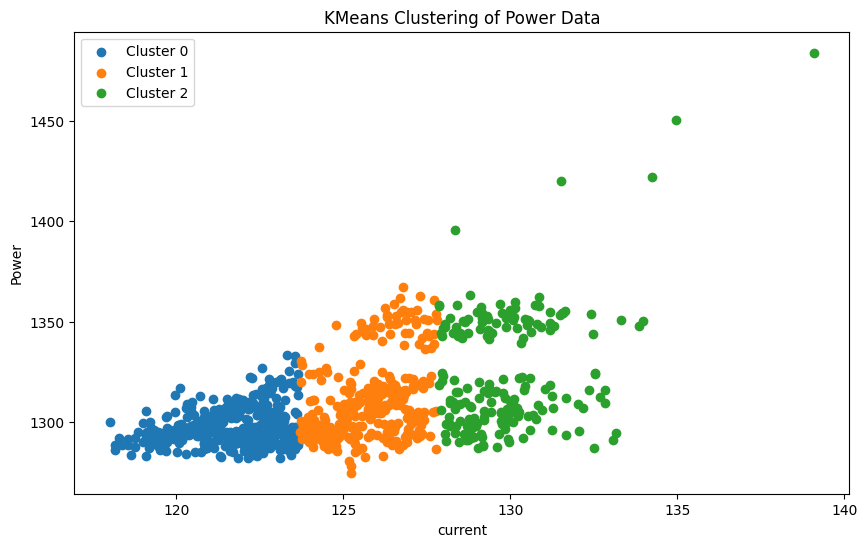

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("preprocessed_data.csv")
# df=df.iloc[:1000,:]

# Separate features (X)
X = df[['MNDE_vib']]

# # Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Ir'], cluster_data['power'], label=f'Cluster {cluster}')

plt.xlabel('current')
plt.ylabel('Power')
plt.title('KMeans Clustering of Power Data')
plt.legend()
plt.show()


#Random Forest for power data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read the CSV file
df = pd.read_csv("preprocessed_data_labeled.csv")

label_map={"class1":1,"class2":2,"class3":3,"class4":4}
df['V_class']=df['V_class'].map(label_map)
df['I_class']=df['I_class'].map(label_map)

# Separate features (X) and target variable (y)
X = df[['Vr', 'Vy', 'Vb','Ir', 'Iy', 'Ib','V_class','I_class']]# Specify the column containing features
y = df['P_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=90)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  7   2   0   0]
 [  0  51  16   0]
 [  0   5 824  25]
 [  1   0  43 368]]
              precision    recall  f1-score   support

      class1       0.88      0.78      0.82         9
      class2       0.88      0.76      0.82        67
      class3       0.93      0.96      0.95       854
      class4       0.94      0.89      0.91       412

    accuracy                           0.93      1342
   macro avg       0.91      0.85      0.88      1342
weighted avg       0.93      0.93      0.93      1342



#DBSCAN Classification for power data

Number of clusters: 8
Number of noise points: 131


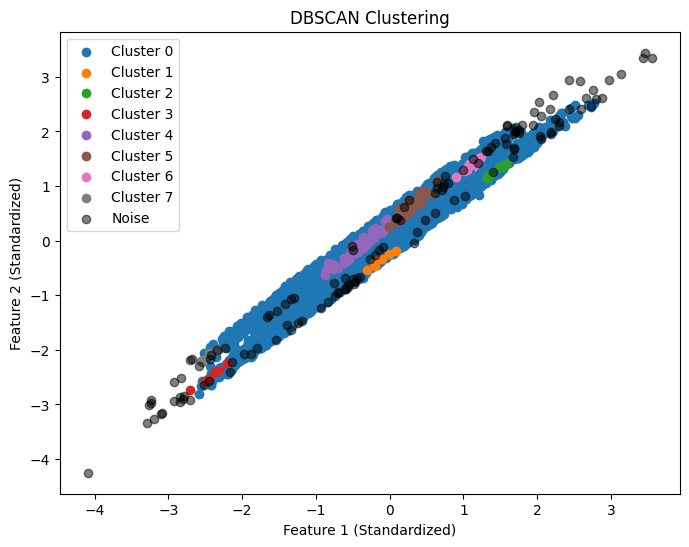

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv("combined_data1_labeled.csv")

# Separate features (X)
X = df[['Vr', 'Vy', 'Vb','Ir', 'Iy', 'Ib','power']]

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.45, min_samples=5)  # Adjust parameters as needed
clusters = dbscan.fit_predict(X_scaled)

# Print the number of clusters and noise points (-1)
print("Number of clusters:", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Number of noise points:", list(clusters).count(-1))

import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot points with different colors based on cluster labels
for cluster_label in set(clusters):
    if cluster_label == -1:
        # Noise points
        plt.scatter(X_scaled[clusters == cluster_label, 0], X_scaled[clusters == cluster_label, 1],
                    color='black', alpha=0.5, label='Noise')
    else:
        # Points in clusters
        plt.scatter(X_scaled[clusters == cluster_label, 0], X_scaled[clusters == cluster_label, 1],
                    label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()


# **LSTM CLASSIFICATION**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Read the CSV file
df = pd.read_csv("preprocessed_data_labeled.csv")

label_map={"class1":1,"class2":2,"class3":3,"class4":4}
df['V_class']=df['V_class'].map(label_map)
df['I_class']=df['I_class'].map(label_map)

# Separate features (X) and target variable (y)
X = df[['Vr', 'Vy', 'Vb','Ir', 'Iy', 'Ib','V_class','I_class']]# Specify the column containing features
y = df['P_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM (add time dimension)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the LSTM Autoencoder model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(X_train_reshaped.shape[1]),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train_reshaped.shape[2]))
])
model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])

# Train the LSTM Autoencoder model
model.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)
model.summary()

# Extract features from the trained Autoencoder
encoder = Sequential(model.layers[:4])  # Extract the encoder part of the model
X_train_encoded = encoder.predict(X_train_reshaped)
X_test_encoded = encoder.predict(X_test_reshaped)

# Create and train the classification model (SVM)
svm = SVC(kernel='rbf')
svm.fit(X_train_encoded.reshape(X_train_encoded.shape[0], -1), y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test_encoded.reshape(X_test_encoded.shape[0], -1))

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
11/11 [==============================] - 7s 114ms/step - loss: 0.8027 - val_loss: 0.8116
Epoch 2/10
11/11 [==============================] - 1s 58ms/step - loss: 0.7702 - val_loss: 0.7809
Epoch 3/10
11/11 [==============================] - 1s 54ms/step - loss: 0.7538 - val_loss: 0.7747
Epoch 4/10
11/11 [==============================] - 1s 52ms/step - loss: 0.7450 - val_loss: 0.7650
Epoch 5/10
11/11 [==============================] - 1s 50ms/step - loss: 0.7323 - val_loss: 0.7566
Epoch 6/10
11/11 [==============================] - 1s 52ms/step - loss: 0.7274 - val_loss: 0.7527
Epoch 7/10
11/11 [==============================] - 1s 50ms/step - loss: 0.7176 - val_loss: 0.7509
Epoch 8/10
11/11 [==============================] - 1s 49ms/step - loss: 0.7078 - val_loss: 0.7411
Epoch 9/10
11/11 [==============================] - 1s 52ms/step - loss: 0.6999 - val_loss: 0.7303
Epoch 10/10
11/11 [==============================] - 1s 50ms/step - loss: 0.6860 - val_loss: 0.7088
Model: "

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **linear regression to predict data**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
df = pd.read_csv("combined_data_labeled.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Convert 'timestamp' column to seconds since midnight
df['timestamp'] = pd.to_timedelta(df['timestamp']).dt.total_seconds()

# Extract features and target variable
X = df[['Date', 'timestamp', 'Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'freq', 'power', 'pf']].copy()
y = df['final_class']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future readings
future_dates = pd.date_range(start='2022-04-11', periods=10, freq='D')  # Example future timestamps
future_timestamps = pd.to_timedelta(pd.date_range(start='2022-04-11', periods=10, freq='D').strftime('%H:%M:%S')).dt.total_seconds()
future_X = pd.DataFrame({
    'Date': future_dates,
    'timestamp': future_timestamps,
    'Vr': np.random.rand(10),  # Example future feature values
    'Vy': np.random.rand(10),
    'Vb': np.random.rand(10),
    'Ir': np.random.rand(10),
    'Iy': np.random.rand(10),
    'Ib': np.random.rand(10),
    'freq': np.random.rand(10),
    'power': np.random.rand(10),
    'pf': np.random.rand(10)
})

# Initialize and fit the linear regression model
future_predictions = model.predict(future_X)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'predicted_final_class': future_predictions})
print(future_df)


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

# **ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 7.4407308858141645


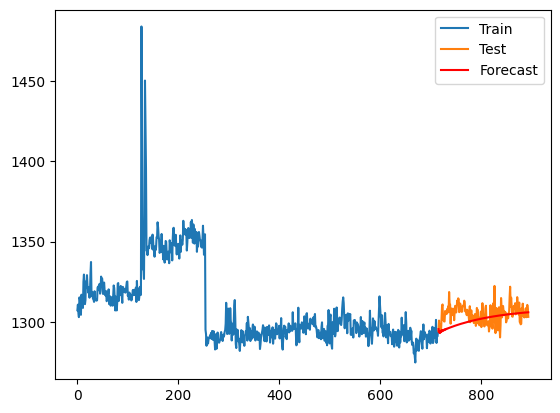

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('combined_data_labeled.csv')

# Convert 'Date' column to datetime
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['timestamp'])
df=df.sort_values(by='timestamp')
df_pow=df[['power']]

# Set 'Date' column as the index
df.set_index('timestamp', inplace=True)

# Check for missing values and handle if necessary
if df.isnull().values.any():
    df = df.fillna(method='ffill')

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df_pow.iloc[:train_size], df_pow.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5,0,2))  # Example order, you may need to tune this
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

# Calculate error metrics
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


# Plot forecast
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()


# **prophet**

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('preprocessed_data.csv')

# Convert 'Date' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.sort_values(by='timestamp')
# start_date = '2024-02-29'
# end_date = '2024-03-17'  # Adjust the end date as needed

# # Select power values between start and end dates
# df = df.loc[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date), ['timestamp', 'power']]

# Select and rename columns as required by Prophet
df_prophet = df[['timestamp', 'power']].copy()
df_prophet.columns = ['ds', 'y']  # Rename columns to 'ds' (date) and 'y' (target)


# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df_prophet)

# Make future dataframe for forecasting
future = model.make_future_dataframe(periods=1440, freq='T')  # Forecast next 24 hours (adjust as needed)

# Forecast
forecast = model.predict(future)
# # Save forecasted values to CSV
# forecast_data = forecast[['ds', 'yhat']]
# forecast_data.columns = ['timestamp', 'Power']  # Renaming columns

# # Save forecasted values to CSV
# forecast_data.to_csv('forecast.csv', index=False)

# print(forecast)

# Plot forecast
plot_plotly(model,forecast)
# plot_components_plotly(model,forecast)



# import pandas as pd
# from prophet import Prophet
# from prophet.plot import plot_plotly, plot_components_plotly
# import matplotlib.pyplot as plt

# # Load the dataset
# df = pd.read_csv('combined_data_labeled.csv')

# # Convert 'Date' column to datetime
# df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['timestamp'])
# df = df.sort_values(by='timestamp')

# # Select and rename columns as required by Prophet
# df_prophet = df[['timestamp', 'power']].copy()
# df_prophet.columns = ['ds', 'y']  # Rename columns to 'ds' (date) and 'y' (target)

# train = df_prophet.iloc[:800]
# test = df_prophet.iloc[800:]

# # Initialize Prophet model
# model = Prophet()

# # Fit the model
# model.fit(train)

# # Make future dataframe for forecasting
# future = model.make_future_dataframe(periods=20000, freq='S')  # Forecast next 24 hours (adjust as needed)

# # Forecast
# forecast = model.predict(future)

# # Plot forecast
# fig = model.plot(forecast)

# # Plot actual values
# plt.plot(test['ds'], test['y'], label='Actual', color='red')

# plt.xlabel('Date')
# plt.ylabel('Power')
# plt.title('Forecast vs Actual')
# plt.legend()
# plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptainjgco/83ed06_u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptainjgco/xiivjdkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76714', 'data', 'file=/tmp/tmptainjgco/83ed06_u.json', 'init=/tmp/tmptainjgco/xiivjdkh.json', 'output', 'file=/tmp/tmptainjgco/prophet_modelw268gfoo/prophet_model-20240421155040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:50:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:50:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **VAR**

<Axes: >

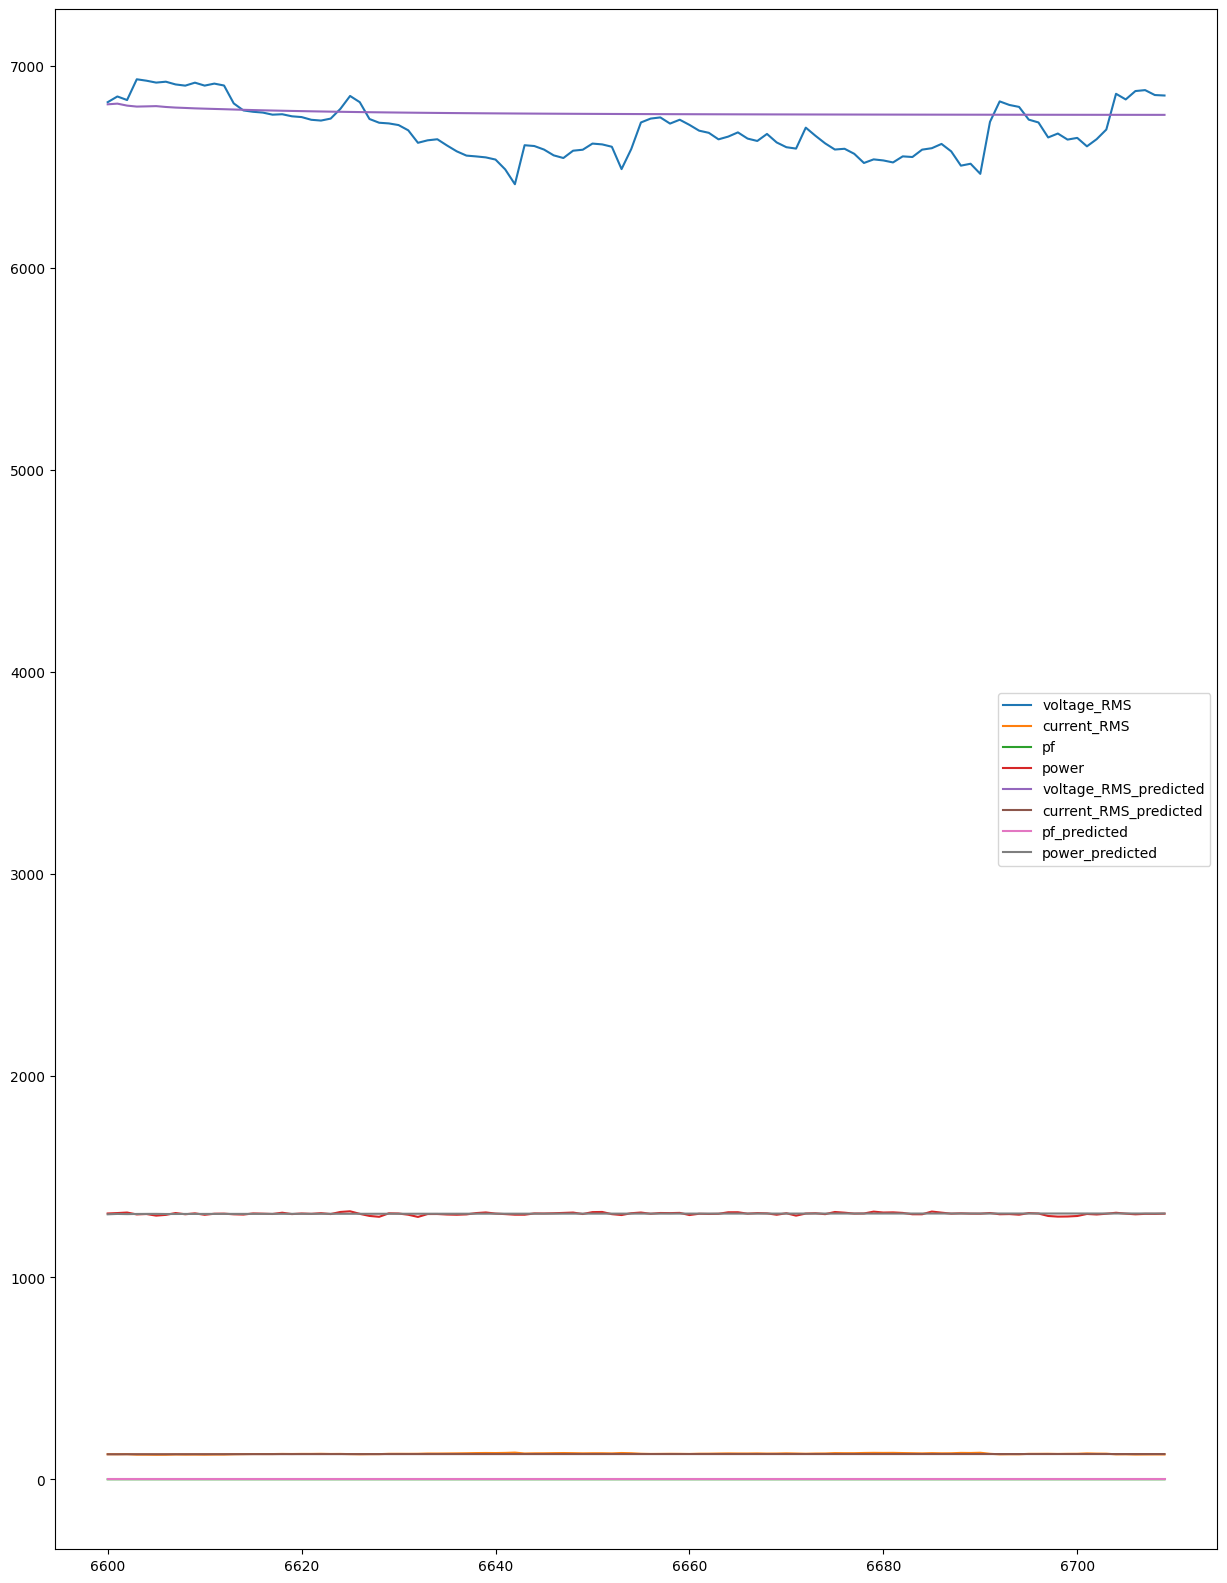

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("preprocessed_data_labeled.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.sort_values(by='timestamp')
# df.set_index('timestamp', inplace=True)
df.head()



ad_fuller_result_1 = adfuller(df['current_RMS'])
print('current')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['power'])
print('power')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')



print('current causes power?\n')
print('------------------')
granger_1 = grangercausalitytests(df[['power', 'current_RMS']], 4)

print('\n power causes current?\n')
print('------------------')
granger_2 = grangercausalitytests(df[['current_RMS', 'power']], 4)



df = df[['voltage_RMS','current_RMS','pf','power']]
print(df.shape)

train_df=df[:6600]
test_df=df[6600:]
test_df.head()

print(test_df.shape)

model = VAR(train_df)

sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

var_model = VARMAX(train_df, order=(7,0))
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

n_forecast =
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')
predictions=predict.predicted_mean

predictions.columns=['voltage_RMS_predicted','current_RMS_predicted','pf_predicted','power_predicted']
predictions

test_vs_pred=pd.concat([test_df,predictions],axis=1)

test_vs_pred.plot(figsize=(15,20))

from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_curent=math.sqrt(mean_squared_error(predictions['current_RMS_predicted'],test_df['current_RMS']))
print('Mean value of current_RMS is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['current_RMS']),rmse_curent))

rmse_voltage=math.sqrt(mean_squared_error(predictions['voltage_RMS_predicted'],test_df['voltage_RMS']))
print('Mean value of voltage_RMS is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['voltage_RMS']),rmse_voltage))

rmse_pf=math.sqrt(mean_squared_error(predictions['pf_predicted'],test_df['pf']))
print('Mean value of power factor is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['pf']),rmse_pf))

rmse_power=math.sqrt(mean_squared_error(predictions['power_predicted'],test_df['power']))
print('Mean value of power is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['power']),rmse_power))

# Ensembled Model (Random forest and LSTM)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Read the CSV file
df = pd.read_csv("combined_data_labeled.csv")

# Separate features (X) and target variable (y) for Random Forest
X_rf = df[['Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'power']]
y_rf = df['final_class']

# Split the data into training and testing sets for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2)

# Standardize features for Random Forest
scaler_rf = StandardScaler()
X_train_rf = scaler_rf.fit_transform(X_train_rf)
X_test_rf = scaler_rf.transform(X_test_rf)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=90)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train_rf, y_train_rf)

# Make predictions on the testing data using Random Forest
rf_pred = rf_classifier.predict(X_test_rf)

# Read the CSV file for LSTM model
df_lstm = pd.read_csv("combined_data_labeled.csv")

# Separate features (X) and target variable (y) for LSTM
X_lstm = df_lstm.iloc[:, 3:12]
y_lstm = df_lstm['final_class']

# Split the data into training and testing sets for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2)

# Standardize features for LSTM
scaler_lstm = StandardScaler()
X_train_lstm = scaler_lstm.fit_transform(X_train_lstm)
X_test_lstm = scaler_lstm.transform(X_test_lstm)

# Reshape input data for LSTM
X_train_reshaped = X_train_lstm.reshape(X_train_lstm.shape[0], 1, X_train_lstm.shape[1])
X_test_reshaped = X_test_lstm.reshape(X_test_lstm.shape[0], 1, X_test_lstm.shape[1])

# Build the LSTM Autoencoder model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False),
    RepeatVector(X_train_reshaped.shape[1]),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train_reshaped.shape[2]))
])
model.compile(optimizer='adam', loss='mae')

# Train the LSTM Autoencoder model
model.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)

# Extract features from the trained Autoencoder
encoder = Sequential(model.layers[:4])
X_train_encoded = encoder.predict(X_train_reshaped)
X_test_encoded = encoder.predict(X_test_reshaped)

# Create and train the SVM model
svm = SVC(kernel='rbf')
svm.fit(X_train_encoded.reshape(X_train_encoded.shape[0], -1), y_train_lstm)

# Make predictions on the testing data using SVM
svm_pred = svm.predict(X_test_encoded.reshape(X_test_encoded.shape[0], -1))

# Evaluate the SVM model
print(confusion_matrix(y_test_lstm, svm_pred))
print(classification_report(y_test_lstm, svm_pred))


Epoch 1/10
11/11 [==============================] - 4s 52ms/step - loss: 0.8040 - val_loss: 0.7255
Epoch 2/10
11/11 [==============================] - 0s 15ms/step - loss: 0.7771 - val_loss: 0.6858
Epoch 3/10
11/11 [==============================] - 0s 11ms/step - loss: 0.7039 - val_loss: 0.5716
Epoch 4/10
11/11 [==============================] - 0s 13ms/step - loss: 0.5144 - val_loss: 0.3939
Epoch 5/10
11/11 [==============================] - 0s 20ms/step - loss: 0.4160 - val_loss: 0.3468
Epoch 6/10
11/11 [==============================] - 0s 21ms/step - loss: 0.3652 - val_loss: 0.3283
Epoch 7/10
11/11 [==============================] - 0s 22ms/step - loss: 0.3216 - val_loss: 0.2798
Epoch 8/10
11/11 [==============================] - 0s 21ms/step - loss: 0.2760 - val_loss: 0.2396
Epoch 9/10
11/11 [==============================] - 0s 22ms/step - loss: 0.2456 - val_loss: 0.2185
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
[[34 17  0]
 [ 9 93  0]
 [ 0  1 25]]
         

# **BLSTM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Bidirectional

# Read the CSV file
df = pd.read_csv("combined_data_labeled.csv")

# Separate features (X) and target variable (y)
X = df.iloc[:,3:12]  # Specify the column containing features
y = df['final_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the BLSTM Autoencoder model
model = Sequential([
    Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False)),
    RepeatVector(X_train_reshaped.shape[1]),
    Bidirectional(LSTM(128, activation='relu', return_sequences=True)),
    TimeDistributed(Dense(X_train_reshaped.shape[2]))
])
model.compile(optimizer='adam', loss='mae')

# Train the BLSTM Autoencoder model
model.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)
model.summary()

# Extract features from the trained Autoencoder
encoder = Sequential(model.layers[:4])  # Extract the encoder part of the model
X_train_encoded = encoder.predict(X_train_reshaped)
X_test_encoded = encoder.predict(X_test_reshaped)

# Create and train the classification model (SVM)
svm = SVC(kernel='rbf')
svm.fit(X_train_encoded.reshape(X_train_encoded.shape[0], -1), y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test_encoded.reshape(X_test_encoded.shape[0], -1))

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
11/11 [==============================] - 12s 154ms/step - loss: 0.7922 - val_loss: 0.6875
Epoch 2/10
11/11 [==============================] - 0s 34ms/step - loss: 0.7202 - val_loss: 0.5702
Epoch 3/10
11/11 [==============================] - 0s 41ms/step - loss: 0.4992 - val_loss: 0.3743
Epoch 4/10
11/11 [==============================] - 0s 37ms/step - loss: 0.3710 - val_loss: 0.3121
Epoch 5/10
11/11 [==============================] - 0s 39ms/step - loss: 0.2877 - val_loss: 0.2380
Epoch 6/10
11/11 [==============================] - 0s 37ms/step - loss: 0.2360 - val_loss: 0.2028
Epoch 7/10
11/11 [==============================] - 0s 35ms/step - loss: 0.2114 - val_loss: 0.1800
Epoch 8/10
11/11 [==============================] - 0s 39ms/step - loss: 0.1782 - val_loss: 0.1589
Epoch 9/10
11/11 [==============================] - 0s 40ms/step - loss: 0.1526 - val_loss: 0.1368
Epoch 10/10
11/11 [==============================] - 0s 37ms/step - loss: 0.1287 - val_loss: 0.1132
Model: 

# **autoncoder to detect anomaly**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense

# Assuming your data is stored in a DataFrame df
# df = pd.read_csv('combined_data_labeled.csv')

# Extract relevant features for anomaly detection
X = df[['Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'pf']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_dim = X_train.shape[1]  # Number of features
encoding_dim = 4  # Number of neurons in the hidden layer

input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)

# Compile the model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Obtain reconstruction errors for each data point
predictions = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(mse) + 2 * np.std(mse)  # Adjust the multiplier as needed

# Flag anomalies based on the threshold
anomalies = mse > threshold

# Add the anomalies to the DataFrame
df['anomaly'] = anomalies.astype(int)

df.to_csv("anomoly_labeled.csv", index=False)
df.head()
# Anomalies will have a value of 1, while normal data points will have a value of 0
# You can further analyze the anomalies and their characteristics based on your specific requirements


Epoch 1/50
23/23 [==============================] - 1s 13ms/step - loss: 1.1198 - val_loss: 1.1276
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 1.0821 - val_loss: 1.0908
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 1.0458 - val_loss: 1.0551
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 1.0112 - val_loss: 1.0210
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.9781 - val_loss: 0.9889
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.9475 - val_loss: 0.9572
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.9176 - val_loss: 0.9284
Epoch 8/50
23/23 [==============================] - 0s 7ms/step - loss: 0.8900 - val_loss: 0.9003
Epoch 9/50
23/23 [==============================] - 0s 9ms/step - loss: 0.8639 - val_loss: 0.8746
Epoch 10/50
23/23 [==============================] - 0s 5ms/step - loss: 0.8403 - val_loss: 0.8509
Epoch 11/50
23/23

,pump_Id,Date,timestamp,Vr,Vy,Vb,Ir,Iy,Ib,freq,power,pf,final_class,anomaly
0,Pump 01,02-26-2024,15:34:35,6512.258789,6646.126465,6606.902344,128.813583,129.891769,126.901161,49.952621,1307.183350,0.872374,class3,0
1,Pump 01,02-26-2024,16:21:55,6768.656738,6906.000977,6866.155762,124.131844,125.164635,121.921127,49.984249,1310.645264,0.875093,class3,0
2,Pump 01,02-26-2024,16:24:39,6736.769531,6876.208008,6832.993652,124.243103,125.303185,121.940392,49.942886,1305.701660,0.875757,class3,0
4,Pump 01,02-26-2024,16:27:28,6725.375488,6863.557129,6819.385254,124.026619,124.980347,121.713524,49.863087,1302.885254,0.876294,class3,0
5,Pump 01,02-26-2024,16:33:02,6702.876953,6841.943848,6797.928223,125.781494,126.950562,123.485809,50.043442,1315.167236,0.875000,class3,0


# **Distribution plot**

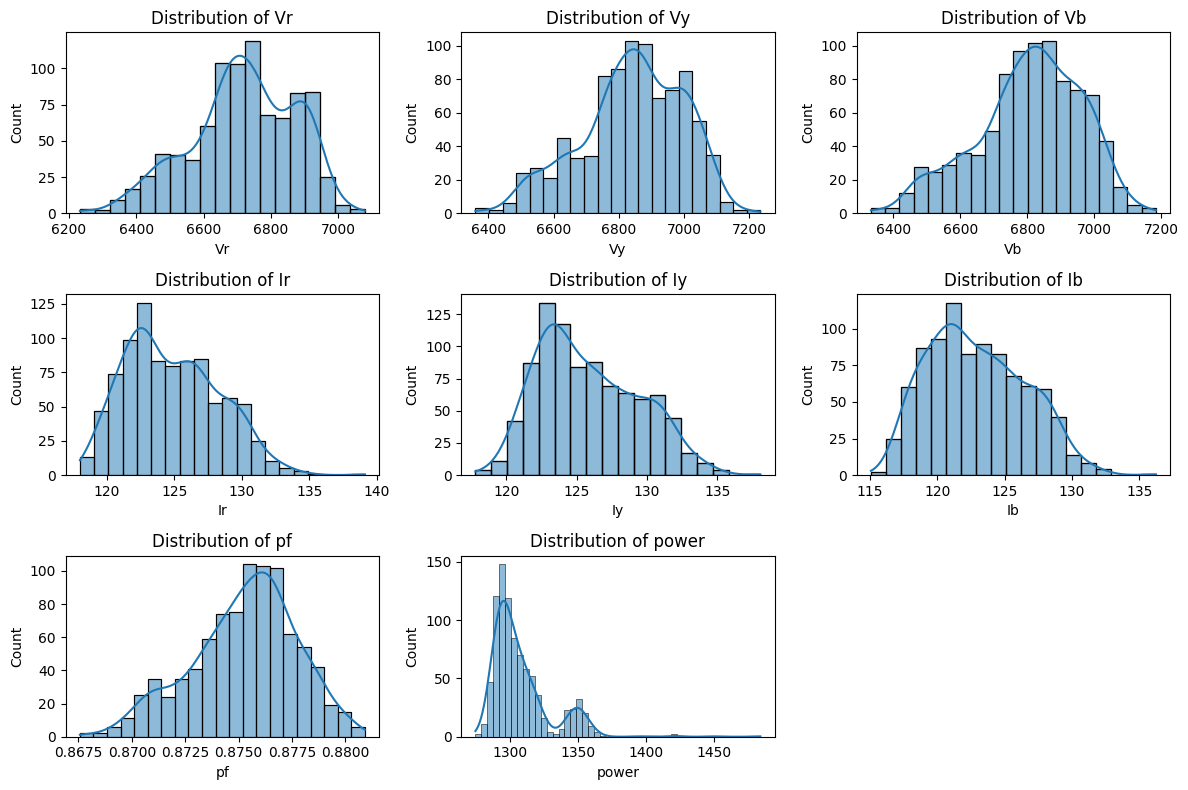

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame df
df = pd.read_csv('combined_data_labeled.csv')

# # Extract numerical features for distribution plot
numerical_features = ['Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'pf','power']

# Plot distribution of numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout based on the number of features
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# label = 'final_class'

# # Plot distribution of numerical features based on the label
# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(numerical_features):
#     plt.subplot(3, 3, i + 1)
#     g = sns.FacetGrid(df, col=label, height=4, aspect=1.5)
#     g.map(sns.histplot, feature, kde=True)
#     plt.subplots_adjust(top=0.9)
#     g.fig.suptitle(f'Distribution of {feature} by {label}')
# plt.tight_layout()
# plt.show()

# **cross validation**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the dataset
df = pd.read_csv("combined_data_labeled.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract features and target variable
X = df[['Date', 'timestamp', 'Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'freq', 'power', 'pf']].copy()
X['timestamp'] = pd.to_timedelta(df['timestamp']).dt.total_seconds()  # Convert timestamp to seconds
y = df['final_class']

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation
try:
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

    # Plot cross-validation scores
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(scores) + 1), scores, color='skyblue')
    plt.xlabel('Fold')
    plt.ylabel('Cross-validation Score')
    plt.title('Cross-validation Scores')
    plt.ylim(0, 1)
    plt.show()

    # Alternatively, you can use a boxplot to visualize the distribution of cross-validation scores
    plt.figure(figsize=(8, 6))
    plt.boxplot(scores)
    plt.xlabel('Cross-validation Fold')
    plt.ylabel('Cross-validation Score')
    plt.title('Distribution of Cross-validation Scores')
    plt.ylim(0, 1)
    plt.show()

    # Print the mean cross-validation score
    print("Mean cross-validation score:", np.mean(scores))
except Exception as e:
    print("Error during cross-validation:", e)


Error during cross-validation: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 648, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.p

#**z score**

In [ ]:
import pandas as pd
import numpy as np

# Assuming your data is in a DataFrame named 'df'
# Columns: ['date', 'timestamp', 'Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'power', 'powerfactor']

df = pd.read_csv("combined_data1_labeled.csv")

def detect_outliers_zscore(df, threshold=3):
    """
    Detect outliers using Z-score method.
    :param df: DataFrame with the time series data
    :param threshold: Threshold value to identify outliers (default=3)
    :return: DataFrame with outliers flagged as True in a new column 'outlier'
    """
    numerical_cols = ['power']
    z_scores = np.abs((df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std())
    outliers = z_scores > threshold
    df['outlier'] = outliers.any(axis=1)
    return df

# Apply outlier detection
df = detect_outliers_zscore(df)

df.to_csv("anomoly_labeled.csv", index=False)
value_counts = df['outlier'].value_counts()
print(value_counts)
df.head()

False    6668
True       52
Name: outlier, dtype: int64


,pump_Id,Date,timestamp,Vr,Vy,Vb,Ir,Iy,Ib,freq,power,pf,final_class,outlier
0,Pump 01,03-01-2024,00:03:00,6606.807617,6674.131836,6601.773926,128.596481,129.703781,126.452805,50.065365,1317.123535,0.872553,class3,False
1,Pump 01,03-01-2024,00:05:46,6515.948242,6585.164063,6515.233398,128.847092,129.948517,126.690971,49.974098,1301.337769,0.871798,class3,False
2,Pump 01,03-01-2024,00:08:33,6476.000977,6540.362305,6472.040039,129.436539,130.256790,127.346108,49.931797,1300.338867,0.871520,class3,False
3,Pump 01,03-01-2024,00:14:12,6487.207031,6557.296875,6485.263672,129.465057,130.603638,127.472611,49.950424,1304.819580,0.871119,class3,False
4,Pump 01,03-01-2024,00:19:51,6498.960449,6566.015625,6499.393555,129.987930,131.062942,127.877472,50.047382,1308.995972,0.870952,class3,False


#**convolutional autoencoder**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Dense

# Read the CSV file
df = pd.read_csv("combined_data_labeled.csv")

# Separate features (X) and target variable (y)
X = df[['Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'power', 'pf']]  # Specify the column containing features
y = df['final_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for Convolutional Autoencoder
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the Convolutional Autoencoder model
input_shape = (X_train_reshaped.shape[1], 1)
input_layer = Input(shape=input_shape)

# Encoder
encoded = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
encoded = MaxPooling1D(2, padding='same')(encoded)
encoded = Conv1D(16, 3, activation='relu', padding='same')(encoded)
encoded = MaxPooling1D(2, padding='same')(encoded)

# Decoder
decoded = Conv1D(16, 3, activation='relu', padding='same')(encoded)
decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(32, 3, activation='relu', padding='same')(decoded)
decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Convolutional Autoencoder model
autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)

# Extract features from the trained Autoencoder
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train_reshaped)
X_test_encoded = encoder.predict(X_test_reshaped)

# Create and train the classification model (SVM)
svm = SVC(kernel='rbf')
svm.fit(X_train_encoded.reshape(X_train_encoded.shape[0], -1), y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test_encoded.reshape(X_test_encoded.shape[0], -1))

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
11/11 [==============================] - 4s 46ms/step - loss: 0.6515 - val_loss: 0.5621
Epoch 2/10
11/11 [==============================] - 0s 14ms/step - loss: 0.4800 - val_loss: 0.3104
Epoch 3/10
11/11 [==============================] - 0s 11ms/step - loss: 0.1157 - val_loss: -0.2118
Epoch 4/10
11/11 [==============================] - 0s 12ms/step - loss: -0.5808 - val_loss: -1.1894
Epoch 5/10
11/11 [==============================] - 0s 15ms/step - loss: -1.9306 - val_loss: -3.2712
Epoch 6/10
11/11 [==============================] - 0s 12ms/step - loss: -4.9338 - val_loss: -7.7804
Epoch 7/10
11/11 [==============================] - 0s 12ms/step - loss: -11.3446 - val_loss: -17.5218
Epoch 8/10
11/11 [==============================] - 0s 12ms/step - loss: -24.2536 - val_loss: -35.9679
Epoch 9/10
11/11 [==============================] - 0s 15ms/step - loss: -48.2913 - val_loss: -69.4940
Epoch 10/10
6/6 [==============================] - 0s 6ms/step
[[ 34  10   0]
 [  3 105   

# **xgboost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read the CSV file
df = pd.read_csv("combined_data_labeled.csv")

label_map={"class1":0,"class2":1,"class3":2,"class4":3}
df['final_class']=df['final_class'].map(label_map)

# Separate features (X) and target variable (y)
X = df[['Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'power']]  # Specify the columns containing features
y = df['final_class']  # Specify the column containing the target variable
df.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 46   0   0]
 [  1 106   0]
 [  0   0  26]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        46
           2       1.00      0.99      1.00       107
           3       1.00      1.00      1.00        26

    accuracy                           0.99       179
   macro avg       0.99      1.00      0.99       179
weighted avg       0.99      0.99      0.99       179



# **xgboost forecast**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from xgboost import XGBClassifier

# Read the CSV file
df = pd.read_csv("combined_data1_labeled.csv")

label_map={"class1":3,"class2":0,"class3":1,"class4":2}
df['final_class']=df['final_class'].map(label_map)

# Separate features (X) and target variable (y)
X = df.iloc[:,3:12]  # Specify the column containing features
y = df['final_class']  # Specify the column containing target variable
df.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = df.iloc[:700,3:12],df.iloc[700:,3:12],df['final_class'].iloc[:700],df['final_class'].iloc[700:]

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM Autoencoder model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False),
    # LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(X_train_reshaped.shape[1]),
    # LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train_reshaped.shape[2]))
])
model.compile(optimizer='adam', loss='mae')

# Train the LSTM Autoencoder model
model.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)
model.summary()

# Extract features from the trained Autoencoder
encoder = Sequential(model.layers[:4])  # Extract the encoder part of the model
X_train_encoded = encoder.predict(X_train_reshaped)
X_test_encoded = encoder.predict(X_test_reshaped)

# Create and train the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_encoded.reshape(X_train_encoded.shape[0], -1), y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test_encoded.reshape(X_test_encoded.shape[0], -1))

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
10/10 [==============================] - 8s 197ms/step - loss: 0.7928 - val_loss: 0.6337
Epoch 2/10
10/10 [==============================] - 0s 23ms/step - loss: 0.7713 - val_loss: 0.6144
Epoch 3/10
10/10 [==============================] - 0s 25ms/step - loss: 0.7136 - val_loss: 0.5667
Epoch 4/10
10/10 [==============================] - 0s 22ms/step - loss: 0.5577 - val_loss: 0.4557
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 0.3854 - val_loss: 0.4195
Epoch 6/10
10/10 [==============================] - 0s 26ms/step - loss: 0.3253 - val_loss: 0.3905
Epoch 7/10
10/10 [==============================] - 0s 26ms/step - loss: 0.2816 - val_loss: 0.3579
Epoch 8/10
10/10 [==============================] - 0s 24ms/step - loss: 0.2377 - val_loss: 0.3337
Epoch 9/10
10/10 [==============================] - 0s 26ms/step - loss: 0.2029 - val_loss: 0.3307
Epoch 10/10
10/10 [==============================] - 0s 26ms/step - loss: 0.1805 - val_loss: 0.3327
Model: "

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **First few Conv1D layers and then few LSTM layers.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, LSTM, Dense

# Read the CSV file
df = pd.read_csv("combined_data_labeled.csv")

# Separate features (X) and target variable (y)
X = df[['Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'power', 'pf']]  # Specify the column containing features
y = df['final_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for Convolutional Autoencoder
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the Conv1D Autoencoder model
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
input_layer = Input(shape=input_shape)

# Encoder (Conv1D)
encoded = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
encoded = MaxPooling1D(2, padding='same')(encoded)
encoded = Conv1D(16, 3, activation='relu', padding='same')(encoded)
encoded = MaxPooling1D(2, padding='same')(encoded)

# LSTM layers
encoded = LSTM(8, return_sequences=True)(encoded)
encoded = LSTM(4, return_sequences=True)(encoded)

# Decoder (Conv1D)
decoded = Conv1D(16, 3, activation='relu', padding='same')(encoded)
decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(32, 3, activation='relu', padding='same')(decoded)
decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Conv1D Autoencoder model
autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)

# Extract features from the trained Autoencoder
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train_reshaped)
X_test_encoded = encoder.predict(X_test_reshaped)

# Create and train the classification model (SVM)
svm = SVC(kernel='rbf')
svm.fit(X_train_encoded.reshape(X_train_encoded.shape[0], -1), y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test_encoded.reshape(X_test_encoded.shape[0], -1))

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
11/11 [==============================] - 11s 333ms/step - loss: 0.6828 - val_loss: 0.6624
Epoch 2/10
11/11 [==============================] - 0s 21ms/step - loss: 0.6437 - val_loss: 0.6046
Epoch 3/10
11/11 [==============================] - 0s 20ms/step - loss: 0.5684 - val_loss: 0.4899
Epoch 4/10
11/11 [==============================] - 0s 17ms/step - loss: 0.4217 - val_loss: 0.2892
Epoch 5/10
11/11 [==============================] - 0s 20ms/step - loss: 0.1932 - val_loss: 0.0300
Epoch 6/10
11/11 [==============================] - 0s 19ms/step - loss: -0.1046 - val_loss: -0.2673
Epoch 7/10
11/11 [==============================] - 0s 18ms/step - loss: -0.4978 - val_loss: -0.7387
Epoch 8/10
11/11 [==============================] - 0s 20ms/step - loss: -1.1672 - val_loss: -1.5657
Epoch 9/10
11/11 [==============================] - 0s 18ms/step - loss: -2.3588 - val_loss: -3.0160
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
[[  0  50   0]
 [  0 103   2]
 [  0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **put the LSTM layers into Bidirectional layers**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, LSTM, Bidirectional, Reshape, Dense

# Read the CSV file
df = pd.read_csv("combined_data_labeled.csv")

# Separate features (X) and target variable (y)
X = df[['Vr', 'Vy', 'Vb', 'Ir', 'Iy', 'Ib', 'power', 'pf']]  # Specify the column containing features
y = df['final_class']  # Specify the column containing target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for Convolutional Autoencoder
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the Conv1D Autoencoder model
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
input_layer = Input(shape=input_shape)

# Encoder (Conv1D)
encoded = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
encoded = MaxPooling1D(2, padding='same')(encoded)
encoded = Conv1D(16, 3, activation='relu', padding='same')(encoded)
encoded = MaxPooling1D(2, padding='same')(encoded)

# Bidirectional LSTM layers
encoded = Bidirectional(LSTM(8, return_sequences=True))(encoded)
encoded = Bidirectional(LSTM(4, return_sequences=False))(encoded)

# Reshape output of Bidirectional LSTM layers
encoded = Reshape((32,))(encoded)

# Decoder (Conv1D)
decoded = Conv1D(16, 3, activation='relu', padding='same')(encoded)
decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(32, 3, activation='relu', padding='same')(decoded)
decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Conv1D Autoencoder model
autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)

# Extract features from the trained Autoencoder
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train_reshaped)
X_test_encoded = encoder.predict(X_test_reshaped)

# Create and train the classification model (SVM)
svm = SVC(kernel='rbf')
svm.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test_encoded)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: Exception encountered when calling layer "reshape_3" (type Reshape).

total size of new array must be unchanged, input_shape = [8], output_shape = [32]

Call arguments received by layer "reshape_3" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 8), dtype=float32)

# **ConvLSTM2D layers  (combines both CNN and LSTM into a single layer)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Bidirectional, ConvLSTM2D, Dense

# Read the CSV file
df = pd.read_csv("combined_data_labeled.csv")

# Separate features (X) and target variable (y)
X = df.iloc[:, 3:12]  # Specify the columns containing features
y = df['final_class']  # Specify the column containing the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for Conv1D
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),
    LSTM(128, activation='relu', return_sequences=True),
    Bidirectional(LSTM(64, activation='relu', return_sequences=True)),
    Reshape((X_train_reshaped.shape[1], -1, 1)),  # Reshape for ConvLSTM2D
    ConvLSTM2D(filters=64, kernel_size=(1, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model
y_pred = model.predict_classes(X_test_reshaped)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: Exception encountered when calling layer "reshape_6" (type Reshape).

total size of new array must be unchanged, input_shape = [5, 128], output_shape = [9, -1, 1]

Call arguments received by layer "reshape_6" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 5, 128), dtype=float32)